# Draw My Friend's LeetCode Progress
Please directly scroll to the end to see the final result


In [1]:
%matplotlib notebook

In [61]:
import pandas

In [18]:
from selenium import webdriver
driver = webdriver.PhantomJS(executable_path=PHANTOM_PATH)
driver.get("https://leetcode.com/accounts/login/")


In [24]:
driver.find_element_by_id("id_login").send_keys(USER_NAME)
driver.find_element_by_id("id_password").send_keys(PASSWORD + "\n")



In [43]:
from bs4 import BeautifulSoup
driver.get(r"https://leetcode.com/problemset/algorithms/")
bs = BeautifulSoup(driver.page_source)

In [60]:
records = []

for e in bs.findAll("span", {"class" : "ac"}):
    tds = e.parent.parent.findAll("td")
    difficulty = tds[-1].get_text().strip()
    title = tds[2].get_text().strip()
    url = "https://leetcode.com" + tds[2].a.attrs["href"] + "submissions/"
    print title, url, difficulty

    driver.get(url)
    bsNew = BeautifulSoup(driver.page_source)
    for rowElem in bsNew.find("", {"id" : "result_testcases"}).findAll("tr"):
        if rowElem.td != None:
            submissionRow = [x.get_text().strip() for x in rowElem.findAll("td")]
            submissionRow = submissionRow[:1] + submissionRow[2:]
            records.append([title, difficulty] + submissionRow)            
    
df = pandas.DataFrame(records, columns=["Name", "Difficulty", "SubmitTime", "Status", "RunTime", "Language"])
print df

Integer Break https://leetcode.com/problems/integer-break/submissions/ Medium
Counting Bits https://leetcode.com/problems/counting-bits/submissions/ Medium
House Robber III https://leetcode.com/problems/house-robber-iii/submissions/ Medium
Odd Even Linked List https://leetcode.com/problems/odd-even-linked-list/submissions/ Medium
Power of Three https://leetcode.com/problems/power-of-three/submissions/ Easy
Bulb Switcher https://leetcode.com/problems/bulb-switcher/submissions/ Medium
Maximum Product of Word Lengths https://leetcode.com/problems/maximum-product-of-word-lengths/submissions/ Medium
Best Time to Buy and Sell Stock with Cooldown https://leetcode.com/problems/best-time-to-buy-and-sell-stock-with-cooldown/submissions/ Medium
Range Sum Query - Immutable https://leetcode.com/problems/range-sum-query-immutable/submissions/ Easy
Bulls and Cows https://leetcode.com/problems/bulls-and-cows/submissions/ Easy
Nim Game https://leetcode.com/problems/nim-game/submissions/ Easy
Word Patte

In [106]:
import re
import datetime

MONTH_RE = re.compile(r"(\d+) month")
WEEK_RE = re.compile(r"(\d+) week")
DAY_RE = re.compile(r"(\d+) day")

def GetDateDiff(s):
    m = MONTH_RE.search(s)
    month = 0 if m == None else int(m.group(1))
    m = WEEK_RE.search(s)
    week = 0 if m == None else int(m.group(1))
    m = DAY_RE.search(s)
    day = 0 if m == None else int(m.group(1))
    return datetime.timedelta(month * 30 + week * 7 + day)

print GetDateDiff("7 months ago")
print GetDateDiff("2 months, 1 week ago")
print datetime.datetime.now()
print datetime.datetime.now() - GetDateDiff("7 months ago")



210 days, 0:00:00
67 days, 0:00:00
2016-04-25 21:59:45.588000
2015-09-28 21:59:45.588000


In [131]:
df["CanonicalSubmitTime"] = df["SubmitTime"].map(lambda x: datetime.datetime.now() - GetDateDiff(x.replace(u'\xa0', ' ')))
df["CanonicalSubmitTime"] = df["CanonicalSubmitTime"].map(lambda x: x.strftime("%Y-%m"))

In [132]:
df.tail()

,Name,Difficulty,SubmitTime,Status,RunTime,Language,CanonicalSubmitTime
1125,Two Sum,Easy,7 months ago,Accepted,56 ms,python,2015-09
1126,Two Sum,Easy,7 months ago,Time Limit Exceeded,N/A,c,2015-09
1127,Two Sum,Easy,7 months ago,Time Limit Exceeded,N/A,c,2015-09
1128,Two Sum,Easy,7 months ago,Time Limit Exceeded,N/A,c,2015-09
1129,Two Sum,Easy,7 months ago,Time Limit Exceeded,N/A,c,2015-09


In [133]:
dfDedup = df.drop_duplicates(subset=["Name"], keep="last")
print len(dfDedup)

113


In [134]:
statDf = pandas.DataFrame()
statDf["ProblemCount"] = dfDedup["Name"].groupby(dfDedup["CanonicalSubmitTime"]).agg(lambda x: len(set(x)))
difficultyDf = dfDedup["Name"].groupby([dfDedup["Difficulty"], df["CanonicalSubmitTime"]]).agg(lambda x: len(set(x)))
statDf["EasyProblemCount"] = difficultyDf["Easy"]
statDf["MediumProblemCount"] = difficultyDf["Medium"]
statDf["HardProblemCount"] = difficultyDf["Hard"]

statDf


,ProblemCount,EasyProblemCount,MediumProblemCount,HardProblemCount
CanonicalSubmitTime,,,,
2015-09,1,1,NaN,NaN
2015-10,5,5,NaN,NaN
2015-11,15,15,NaN,NaN
2015-12,16,15,1,NaN
2016-01,24,23,1,NaN
2016-02,18,7,10,1
2016-03,4,1,3,NaN
2016-04,30,3,25,2


ProblemCount          113
EasyProblemCount       70
MediumProblemCount     40
HardProblemCount        3
dtype: float64


<IPython.core.display.Javascript object>


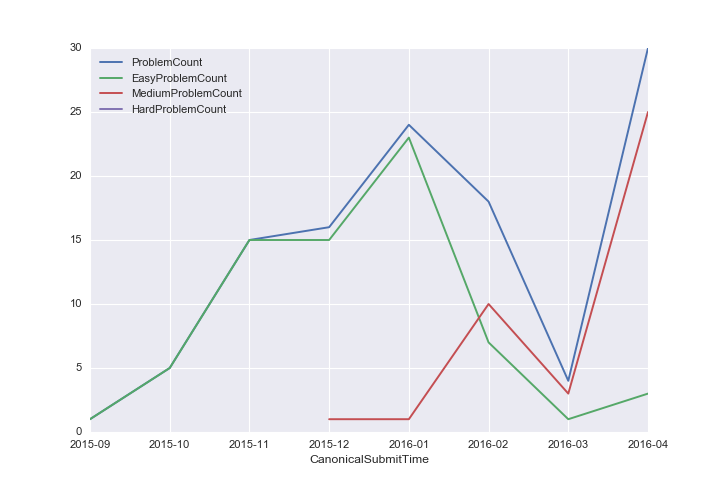

In [135]:
print statDf.sum()
statDf.plot()